<a href="https://colab.research.google.com/github/bachinaram/DataAnalytics1/blob/main/DA1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np
from numpy import where
from numpy import unique

import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)


from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
import seaborn as sns
import math
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



In [55]:
df = pd.read_csv('/content/sample_data/football_data.csv')

Data Cleaning


In [56]:
a=[10,20];b=[30,40]
for i,j in a,b:
  print(i)
  print(j)

10
20
30
40


In [57]:
def last_feature(my_value):
  if type(my_value) is float:
    return np.nan
  elif my_value == '':
    return np.nan
  elif my_value == np.nan:
    return np.nan
  elif my_value == ' ':
    return np.nan
  start = -10+6
  value_size = len(my_value)

  if value_size > 4:
    my_value = my_value[start:value_size]
  my_result = float(my_value)
  return my_result

In [58]:
def convert_feet_to_inches(my_value):
  output=0
  first_of_my_value = 0
  second_of_my_value=0
  
  if type(my_value) is float:
    return np.nan
  elif my_value == '':
    return np.nan
  elif my_value == np.nan:
    return np.nan
  elif my_value == ' ':
    return np.nan

  value_size = len(my_value)
  my_value = my_value.split('\'')
  if value_size == 1:
    
    first_of_my_value = int(my_value[0])
    output = first_of_my_value*12
    return output
  else:
    first_of_my_value = int(my_value[0])
    second_of_my_value=my_value[1]
    output = first_of_my_value*12
    final_result= float(output)+float(second_of_my_value)
    return final_result

 

In [59]:
def convert_wt_to_float(my_value):
  if type(my_value) is float:
    return np.nan
  elif my_value == '':
    return np.nan
  elif my_value == np.nan:
    return np.nan
  elif my_value == ' ':
    return np.nan


  act_len = len(my_value)
  act_len_final = act_len-3
  index=0
  my_value = my_value[index:act_len_final]
  result = float(my_value)
  return result



In [60]:
def remove_time_feature(my_value):
  if type(my_value) is float:
    return np.nan
  elif my_value == '':
    return np.nan
  elif my_value == np.nan:
    return np.nan
  elif my_value == ' ':
    return np.nan
  act_len = len(my_value)
  act_len_final = act_len-1
  start=1
  my_value = my_value[start:act_len_final]
  result = float(my_value)
  return result

In [61]:
def allnumeric_to_alldouble(my_value):
  if type(my_value) is float:
    return np.nan
  elif my_value == '':
    return np.nan
  elif my_value == np.nan:
    return np.nan
  elif my_value == ' ':
    return np.nan
  

  my_value = my_value.split('+')
  second_part=float(int(my_value[1]))
  first_part=float(int(my_value[0]))
  output = first_part + second_part
  return output

In [62]:
def eclu_dist(a,b):
    formul = 0
    size=len(a)
    for eachV in range(size):
        formul = formul + ((a[eachV] - b[eachV]) ** 2)
    return formul

In [63]:
def numeric_to_float(myvalue):
  a=myvalue[1]
  if myvalue == ' ':
    return np.nan
  elif myvalue == '':
    return np.nan
  elif myvalue == np.nan:
    return np.nan
  if a == '0':
    return np.nan
  act_len = len(myvalue)
  act_len_final = act_len -1  
  myvalue = myvalue[1:act_len_final]
  return float(myvalue)

In [64]:
def find_dist_score(centroid,cluster):
  intial_score = 0
  for i in range(len(centroid)):
    for j in range(len(cluster[i])):
      intial_score = intial_score + eclu_dist(cluster[i][j],centroid[i])
  result_score = math.sqrt(intial_score)
  return result_score

In [86]:


def divisive(every_cluster, t_c,inc):
  z=len(call)
  if z == t_c:
    return
  twomeans = KMeans(n_clusters=2,random_state=42)
  twomeans.fit(every_cluster)
  centroids = twomeans.cluster_centers_
  for i in range(2):
    all_centroids.append(centroids[i])
  labels = twomeans.labels_
  external=[];in1=[];in2 =[];c1=[];c2=[]
  lab = inall.pop(inc)
  length_of_labels=len(labels)

  for i in range(length_of_labels):
    if labels[i] == 0:
      c1.append(every_cluster[i])
      in1.append(lab[i])
    else:
      c2.append(every_cluster[i])
      in2.append(lab[i])

  clist=['c1','c2'];inlist=['in1','in2']

  #for i,j in clist,inlist:
    #call.append(i)
    #inall.append(j)

  call.append(c1)
  call.append(c2)
  inall.append(in1)
  inall.append(in2)


  z1 = len(call)
  if z1 == t_c:
    return

#for j in all_clusters[i]:

  for i in range(z1):
    internal = 0
    for j in call[i]:
      internal = internal + eclu_dist(all_centroids[i],j)
    
    tmp1=len(call[i])
    tmp2=internal/tmp1
    external.append(tmp2)

  max_value = max(external)  
  pointer = external.index(max_value)

  every_cluster = call.pop(pointer)
  all_centroids.pop(pointer)
  if len(call) == t_c:
    return

  divisive(every_cluster,t_c,pointer)
  

In [66]:
df.drop(df.columns[24], axis=1, inplace=True)
df['LDM'] = df['LDM'].apply(allnumeric_to_alldouble)
df['LS'] = df['LS'].apply(allnumeric_to_alldouble)
df['ST'] = df['ST'].apply(allnumeric_to_alldouble)
df['Wage'] = df['Wage'].apply(numeric_to_float)
df['LF'] = df['LF'].apply(allnumeric_to_alldouble)
df['CF'] = df['CF'].apply(allnumeric_to_alldouble)
df['RM'] = df['RM'].apply(allnumeric_to_alldouble)
df['Release Clause'] = df['Release Clause'].apply(remove_time_feature)
df['RF'] = df['RF'].apply(allnumeric_to_alldouble)
df['RW'] = df['RW'].apply(allnumeric_to_alldouble)
df['Weight'] = df['Weight'].apply(convert_wt_to_float)
df['CAM'] = df['CAM'].apply(allnumeric_to_alldouble)
df['RB'] = df['RB'].apply(allnumeric_to_alldouble)
df['LCB'] = df['LCB'].apply(allnumeric_to_alldouble)
df['RAM'] = df['RAM'].apply(allnumeric_to_alldouble)
df['LM'] = df['LM'].apply(allnumeric_to_alldouble)
df['RS'] = df['RS'].apply(allnumeric_to_alldouble)
df['LW'] = df['LW'].apply(allnumeric_to_alldouble)
df['CM'] = df['CM'].apply(allnumeric_to_alldouble)
df['Height'] = df['Height'].apply(convert_feet_to_inches)
df['RCM'] = df['RCM'].apply(allnumeric_to_alldouble)
df['LWB'] = df['LWB'].apply(allnumeric_to_alldouble)
df['Value'] = df['Value'].apply(numeric_to_float)
df['LCM'] = df['LCM'].apply(allnumeric_to_alldouble)
df['RDM'] = df['RDM'].apply(allnumeric_to_alldouble)
df['LAM'] = df['LAM'].apply(allnumeric_to_alldouble)
df['RWB'] = df['RWB'].apply(allnumeric_to_alldouble)
df['LB'] = df['LB'].apply(allnumeric_to_alldouble)
df['CB'] = df['CB'].apply(allnumeric_to_alldouble)
df['RCB'] = df['RCB'].apply(allnumeric_to_alldouble)
df['CDM'] = df['CDM'].apply(allnumeric_to_alldouble)
df['Contract Valid Until'] = df['Contract Valid Until'].apply(last_feature)


In [67]:
dframeNumber = df.select_dtypes(include=['float64','int64'])

dframeNumber_sample = dframeNumber.drop(dframeNumber.columns[[0, 1]], axis=1)

features = list(dframeNumber_sample.columns)



In [68]:
user_cts = [3,5,7,9,11]
for feature in features :
  dframeNumber_sample[feature]=dframeNumber_sample[feature].apply(lambda ab: float(ab))
  dframeNumber_sample.fillna(value=dframeNumber_sample[feature].mean(),inplace= True)
convert_to_min_max = MinMaxScaler()
normalizeData = convert_to_min_max.fit_transform(dframeNumber_sample)
data_scale_array = np.array(normalizeData)
array_of_scores=[];silhscore=[];full_st = []

Agglomerative approach

looping array of clusters

In [69]:
for clst in user_cts:
  data_scale_array = normalizeData.copy()
  bottomup = AgglomerativeClustering(n_clusters=clst,affinity='euclidean', linkage='ward')
  bottomup.fit(data_scale_array)
  cfeatures = bottomup.labels_
  bottomupclt = bottomup.fit_predict(data_scale_array)
  full_st.append(silhouette_score(data_scale_array,bottomupclt))

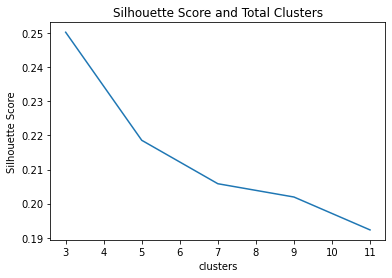

In [70]:

plt.plot(user_cts, full_st) 
plt.title('Silhouette Score and Total Clusters') 
plt.xlabel('clusters')
plt.ylabel('Silhouette Score')
plt.show()

Dendogram Agglomerative Clustering

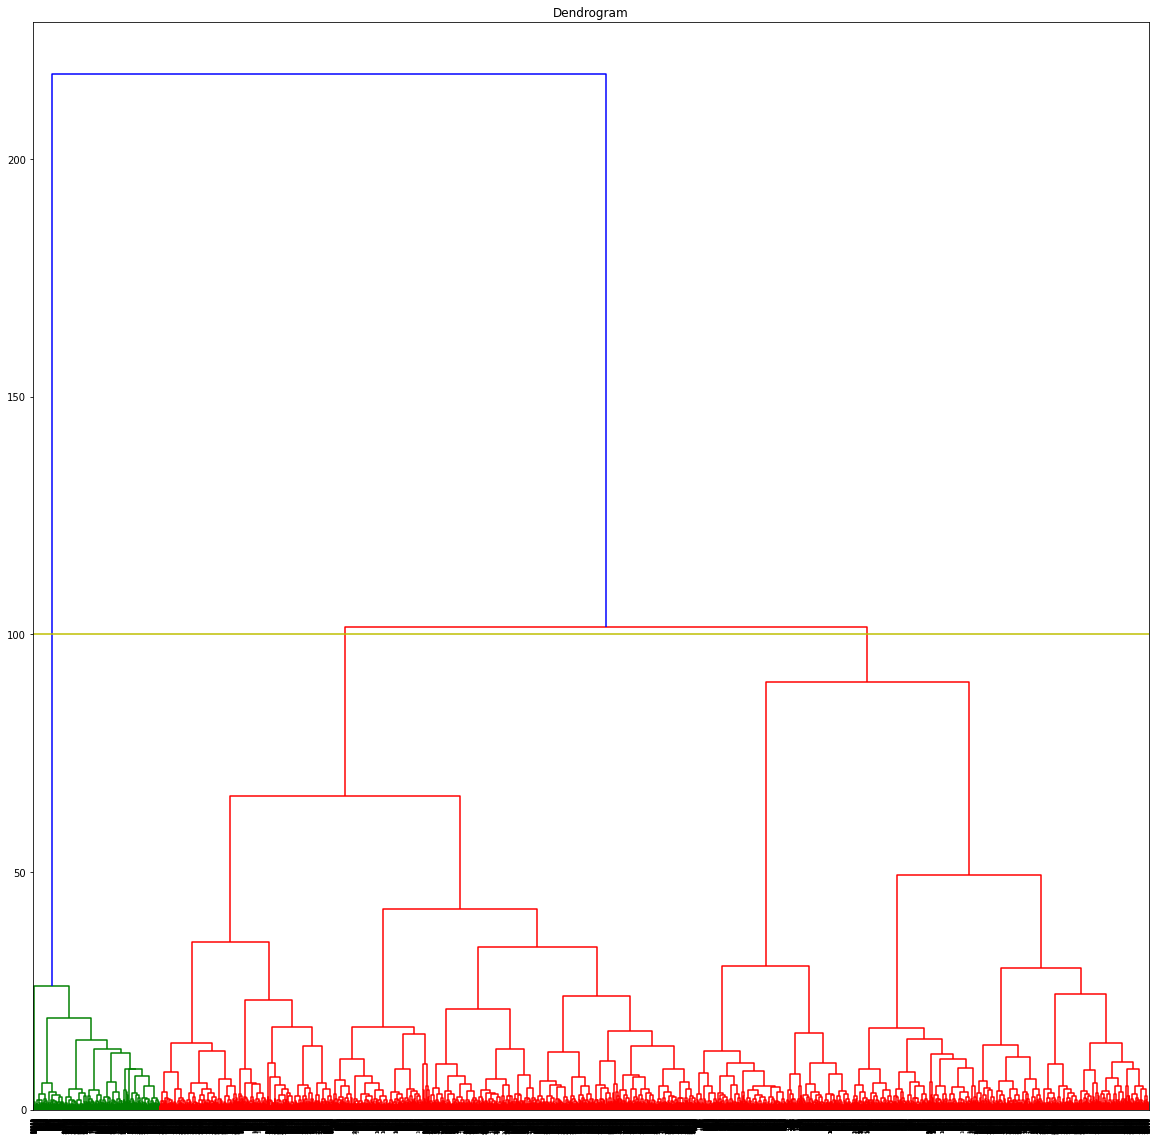

In [71]:

plt.figure(figsize=(20, 20))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(normalizeData, method='ward'))
plt.axhline(y=100, color='y', linestyle='solid')

3 Cluster configuration

In [72]:
data_scale_array = normalizeData.copy()
bottomup = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
bottomup.fit(data_scale_array)
cfeatures = bottomup.labels_
bottomupclt = bottomup.fit_predict(data_scale_array)

Finding Correlation Matrix and the most Correlated Attributes.

Distortion and Silhouette Score

In [73]:


from sklearn.neighbors.nearest_centroid import NearestCentroid
nearestcentroid = NearestCentroid()
nearestcentroid.fit(data_scale_array, bottomupclt)
centroids = nearestcentroid.centroids_

In [74]:


silhscore=[];array_of_scores=[];all_clusters=[];cluster1=[];cluster2=[];cluster3=[]
first_value = bottomupclt.shape[0]
t=0

for every_element in range(first_value):
  if(bottomupclt[every_element] == t):
    cluster1.append(data_scale_array[every_element])
    t=t+1
for every_element in range(first_value):
  if(bottomupclt[every_element] == t):
    cluster2.append(data_scale_array[every_element])
    t=t+1
for every_element in range(first_value):
  if(bottomupclt[every_element] == t):
    cluster3.append(data_scale_array[every_element])


array1_cluster = np.array(cluster1)
array2_cluster = np.array(cluster2)
array3_cluster = np.array(cluster3)
all_clusters.append(array1_cluster)
all_clusters.append(array2_cluster)
all_clusters.append(array3_cluster)
d = find_dist_score(centroids, all_clusters)
array_of_scores.append(d)
e = silhouette_score(data_scale_array, cfeatures)
silhscore.append(e)
print("Silhouette Score is ",silhouette_score(data_scale_array, bottomupclt))
print("Distortion is ",array_of_scores[0])


Silhouette Score is  0.2502321210282322
Distortion is  5.1609163368778015


Cluster Name

Number of Points in Clusters

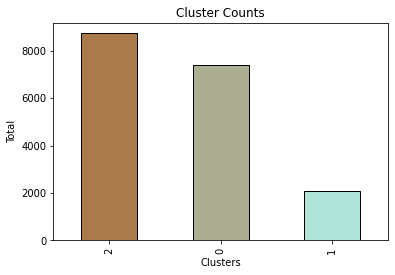

In [77]:






target_counts = pd.Series(bottomupclt).value_counts()
target_counts.plot.bar(color=['#aa7a4a', '#abae91', '#afe4d9'], edgecolor='black');
plt.title('Cluster Counts')
plt.xlabel('Clusters')
plt.ylabel('Total');



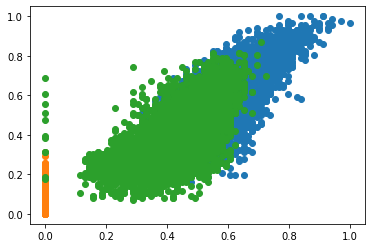

In [78]:
myFinalGroup = unique(bottomupclt)
for eachclus in myFinalGroup:
	i = where(bottomupclt == eachclus)
	plt.scatter(data_scale_array[i, 13], data_scale_array[i, 43])
 

Top Down Approach

Body of The Top Down Approach

Number of CLuster = 3

In [88]:


final_score=[]
for k in user_cts:
  start = 0
  data_scale_array = normalizeData.copy()
  range_val = data_scale_array.shape[0]
  cache = [];inall = [];all_centroids = [];call = []
  for eachVal in range(range_val):
    cache.append(eachVal)
  inall.append(cache)
  
  divisive(data_scale_array,k,start)
  label = [None]*data_scale_array.shape[0]

  l = 0
  for m in inall:
    for i in m:
      label[i] = l
    l = l+1
  x = silhouette_score(data_scale_array,label)
  final_score.append(x)

DIVISIVE approach - Silhouette Score and Total Clusters

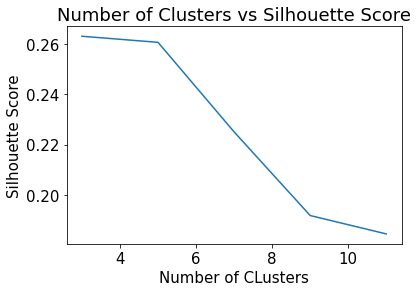

In [ ]:

plt.plot(user_cts, final_score) 
plt.title('Silhouette Score and Total Clusters') 
plt.xlabel('clusters')
plt.ylabel('Silhouette Score')
plt.show()

Best Top Down Model with Cluster Number = 3

In [91]:


data_scale_array = normalizeData.copy()
cache = [];inall = [];all_centroids = [];call = []
for eachVal in range(range_val):
  cache.append(eachVal)
inall.append(cache)
  
divisive(data_scale_array,3,start)
label = [None]*data_scale_array.shape[0]

l = 0
for m in inall:
  for i in m:
    label[i] = l
  l = l+1


In [94]:
array_of_scores.append(find_dist_score(all_centroids,call))
silhscore.append(silhouette_score(data_scale_array,label))

#intra distortion and silhouette
print("Silhouette Score is ",silhscore[1])
print("Distortion is ",array_of_scores[1])

Silhouette Score is  0.26305294569383864
Distortion is  144.59723205507896


Dendrogram of Divisive Clustering

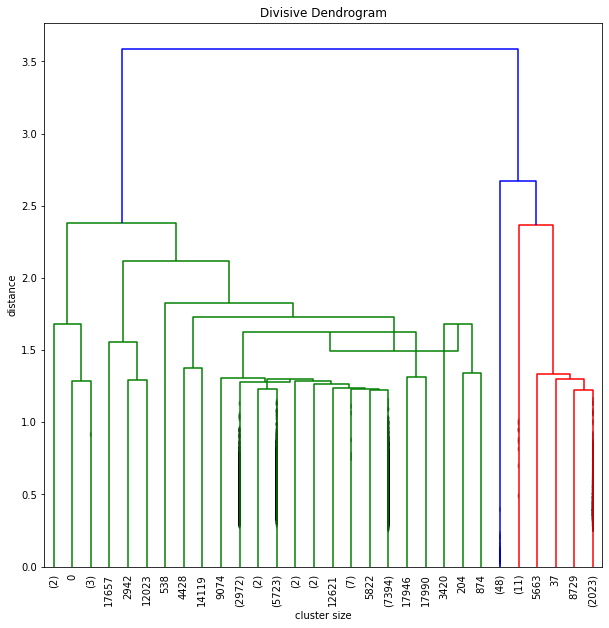

In [95]:


from scipy.cluster.hierarchy import linkage, dendrogram
data_scale_array = normalizeData.copy()
distances = linkage(data_scale_array, method="centroid", metric="euclidean")
def annotated_dendrogram(*args, **kwargs):
    dendogram1 = dendrogram(*args, truncate_mode='lastp', show_contracted=True,leaf_rotation=90.)

    plt.title('Divisive Dendrogram')
    plt.xlabel('cluster size')
    plt.ylabel('distance')
    
    for i, d, c in zip(dendogram1['icoord'], dendogram1['dcoord'], dendogram1['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 10:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    return dendogram1
plt.figure(figsize=(10,10))
dn = annotated_dendrogram(distances)
plt.show()

Cluster Names

Number of Points in a Cluster

Cluster0  2109
Cluster1  8088
Cluster2  8010


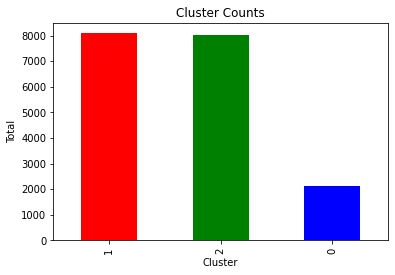

In [97]:


target_counts = pd.Series(label).value_counts()
target_counts.plot.bar(color=['Red', 'green', 'blue']);

plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Total');
print("Cluster0 ", target_counts[0])
print("Cluster1 ", target_counts[1])
print("Cluster2 ", target_counts[2])


Cluster Visualization


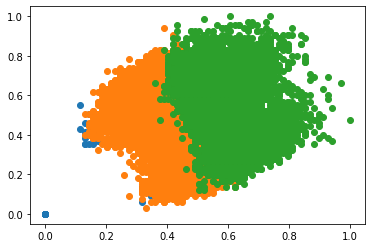

In [98]:
my_final_clust = unique(label)
for each_cluster in my_final_clust:
	z = where(label == each_cluster)
	plt.scatter(data_scale_array[z, 14], data_scale_array[z, 37])

#Comparison of Agglomerative and Divisive

Text(0.5, 1.0, 'Distortion of Agglomerative and Divisive')

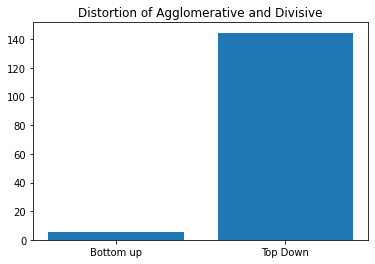

In [99]:
D = {'Bottom up':array_of_scores[0],'Top Down':array_of_scores[1]}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title('Distortion of Agglomerative and Divisive')

Text(0.5, 1.0, 'Silhouette Score of Agglomerative and Divisive')

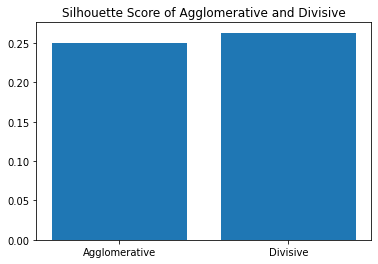

In [100]:
D = {'Agglomerative':silhscore[0],'Divisive':silhscore[1]}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title('Silhouette Score of Agglomerative and Divisive')
